In [1]:
from pyfile import W, Z, Swap, eval
from discopy.quantum.zx import Spider, Id

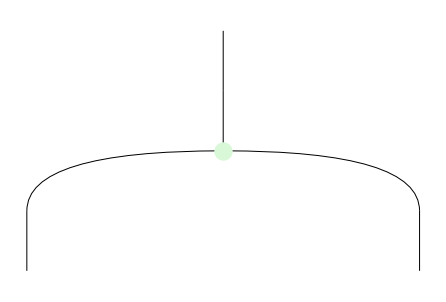

/home/agnew/Desktop/code/zxw-diagrams/pyfile.py:92: ComplexWarning: Casting complex values to real discards the imaginary part
  return t.array.astype(float).reshape(2**n, 2**m).transpose()


array([[1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.]])

In [2]:
Z(1, 2).draw()
eval(Z(1, 2))

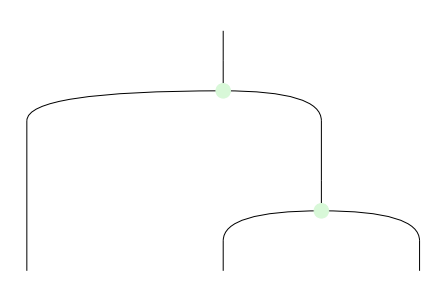

In [3]:
a = Z(1, 2) >> Z(1, 2) @ Id(1)
b = Z(1, 2) >> Id(1) @ Z(1, 2)
b.draw()

In [4]:
(eval(a) == eval(b)).all(), (eval(b) == eval(Z(1, 3))).all()

(True, True)

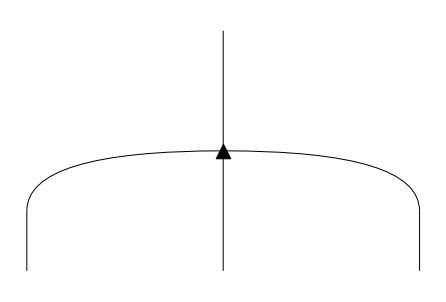

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [5]:

    
W(3).draw() 
eval(W(3))

## Rules

### W swaps

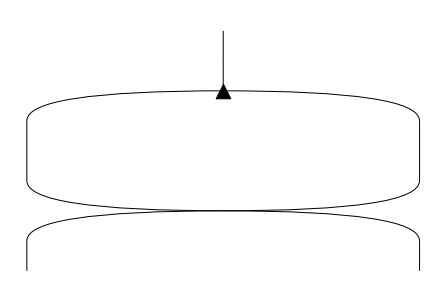

True

In [8]:
ws = W(2) >> Swap
ws.draw()
(eval(ws) == eval(W(2))).all()

### W fusion

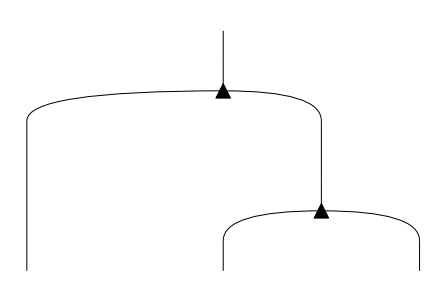

In [9]:
d = W(2) >> Id(1) @ W(2)
d.draw()

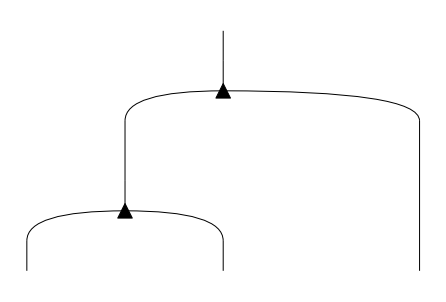

In [10]:
d2 = W(2) >> W(2) @ Id(1)
d2.draw()

In [11]:
(eval(d) == eval(d2)).all()

True

### bialgebra

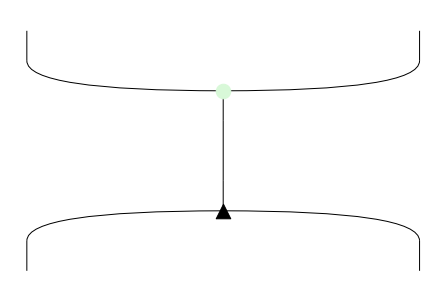

In [12]:
b1 = Z(2, 1) >> W(2)
b1.draw()

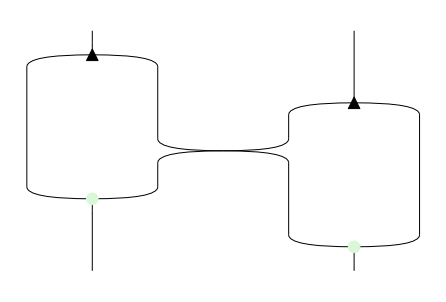

In [17]:
b2 = W(2) @ W(2) >> Id(1) @ Swap @ Id(1) >> Z(2, 1) @ Z(2, 1)
b2.draw()

In [18]:
(eval(b1) == eval(b2)).all()

True

### w algebra

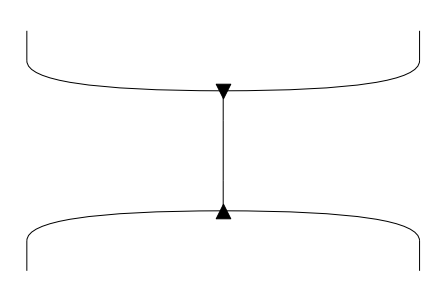

In [19]:
a1 = W(2).T() >> W(2)
a1.draw()

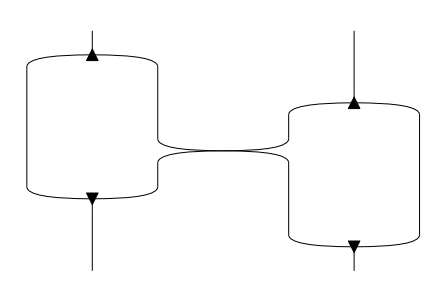

In [21]:
a2 = W(2) @ W(2) >> Id(1) @ Swap @ Id(1) >> W(2).T() @ W(2).T()
a2.draw()

In [23]:
eval(a1), eval(a2)
# need fswap!!

(array([[1., 0., 0., 0.],
        [0., 1., 1., 0.],
        [0., 1., 1., 0.],
        [0., 0., 0., 0.]]),
 array([[1., 0., 0., 0.],
        [0., 1., 1., 0.],
        [0., 1., 1., 0.],
        [0., 0., 0., 2.]]))

### $\Pi_{2,2}$

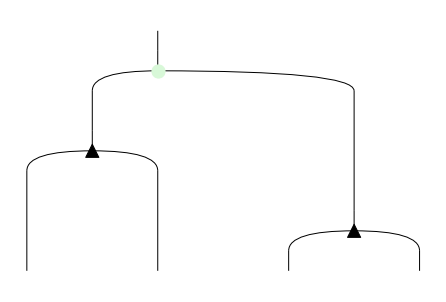

In [25]:
s = Z(1, 2) >> W(2) @ W(2)
s.draw()

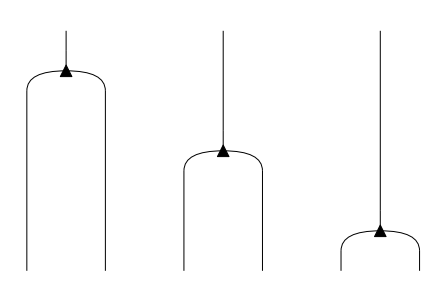

In [29]:
def T(A, n):
    # return A^n
    if n == 1: return A
    return A @ T(A, n-1)


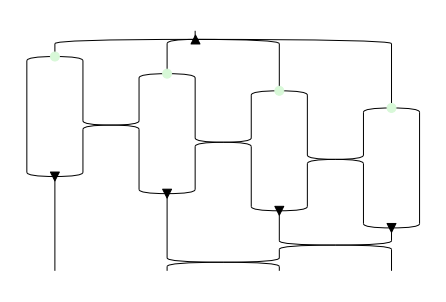

In [33]:
s2 = W(4) >> T(Z(1, 2), 4) >> Id(1) @ Swap @ Swap @ Swap @ Id(1) >> T(W(2).T(), 4) >> Id(2) @ Swap >> Id(1) @ Swap @ Id(1)
s2.draw()

In [34]:
(eval(s) == eval(s2)).all()

True